In [ ]:
!pip install opencv-python matplotlib pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/archive'
print("Files in directory:", os.listdir(data_dir))


Files in directory: ['README.roboflow.txt', 'README.dataset.txt', 'data.yaml', 'train', 'test', 'valid']


In [ ]:
images_dir = os.path.join(data_dir, 'train','images')
labels_dir = os.path.join(data_dir,  'train','labels')
print("no of img:", len(os.listdir(images_dir)))
print("No of labels:", len(os.listdir(labels_dir)))


no of img: 2105
No of labels: 2105


['3 0.74765625 0.67109375 0.31484375 0.34921875']


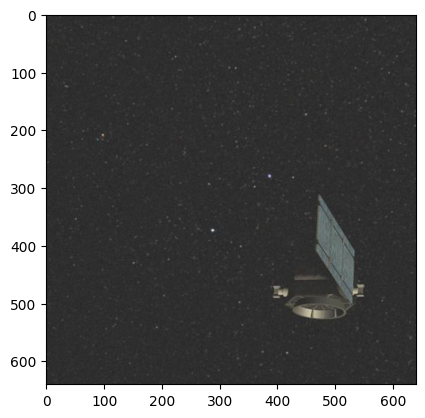

In [ ]:
sample_image = os.listdir(images_dir)[37]
img = cv2.imread(os.path.join(images_dir, sample_image))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

sample_label = sample_image.replace('.jpg', '.txt')
with open(os.path.join(labels_dir, sample_label)) as f:
    labels = f.readlines()
print( labels)
# there are 11 classes with multiple objects type to


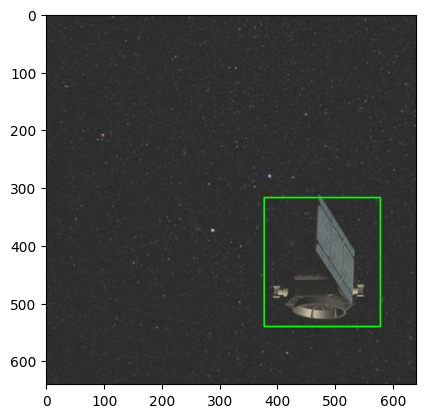

In [ ]:
h, w = img.shape[:2]
for line in labels:
    cls, x, y, bw, bh = map(float, line.strip().split()) #since x is width y is height, un-normalize them and draw bounding boxes around objects
    xc, yc = int(x*w), int(y*h)
    box_w, box_h = int(bw*w), int(bh*h)
    x1, y1 = int(xc - box_w/2), int(yc - box_h/2)
    x2, y2 = int(xc + box_w/2), int(yc + box_h/2)
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
import glob
label_files = glob.glob(os.path.join(labels_dir, '*.txt'))
class_counts = {}
for lbl_file in label_files:
    with open(lbl_file) as f:
        for line in f:
            cls = int(line.split()[0])
            class_counts[cls] = class_counts.get(cls, 0) + 1

print("classes:", class_counts)


classes: {9: 183, 3: 178, 0: 214, 5: 213, 1: 186, 2: 196, 7: 168, 8: 188, 6: 191, 4: 190, 10: 198}
